In [1]:
from multiprocessing import Pool
import multiprocessing
import worker
from timeit import default_timer as timer

In [2]:
__name__

'__main__'

In [25]:
if __name__=='__main__':
    num_processors = 4
    p=Pool(processes = num_processors)
    out = p.apply_async(worker.worker,[],{'x':532})

In [26]:
out.get()

283024

In [3]:
multiprocessing.cpu_count()

12

In [10]:
#Create sizes for 3 arrays. 
sizes = [50 * 10**6 for i in range(10)] #Size of each array is 5 million here.
#Applying the function sequentially
tic = timer()
[worker.createandsort(size) for size in sizes]
tac = timer()
print("time for sequential sorting: ", tac-tic)
#Using multiprocessing
if __name__ == "__main__":
    pool = Pool(processes=10)
    tic = timer()
    pool.map(worker.createandsort,sizes)
    tac = timer()
    print("time for parallel sorting: ",tac-tic)

time for sequential sorting:  46.98313239999993
time for parallel sorting:  6.80291950000003


In [1]:
import utils as ut
import pickle
import model_based_agent as mba

ImportError: could not find any library for ueye_api (DLL_PATH: unset)

In [83]:
class DataHandler():
    # Takes output of worm trials and formats/stores for model and agent use.
    # Tries to ensure that a matching parameters dictionary has been saved with each df. 
    def __init__(self):
        self.clear_df()

    def add_dict_to_df(self,fnames,**kwargs):
        # Takes fnames as a list.
        # kwargs are the arguments that would go to make_df() in utils.
        # Can run this when self.df is empty or exists. If exists, then adds to existing df.
        for key,val in kwargs.items():
            self.params[key] = val 
        if len(kwargs)==0:
            print('No kwargs')
            kwargs = self.params 
        
        self.df = ut.make_df(fnames, old_frame=self.df, **kwargs)

    def add_df_to_df(self,fnames):
        # Takes fnames as list
        for fname in fnames:
            with open(fname,'rb') as f:
                self.df = self.df.append(pickle.load(f), ignore_index=True)

    def load_df(self,fname):
        with open(fname,'rb') as f:
            self.df = pickle.load(f)
        with open(fname[:-4]+'_params.pkl','rb') as f:
            self.params = pickle.load(f) 
        
    def clear_df(self):
        self.df = None 
        self.params = {
            'reward_ahead': None,
            'timestep_gap': None,
            'prev_act_window': None,
            'jump_limit': None,
        }

    def save_dfs(self,fname):
        self.df.to_pickle(fname) 
        with open(fname[:-4]+'_params.pkl','wb') as f:
            pickle.dump(self.params, f)
    
    def __str__(self):
        if self.df is None:
            return f'No dataframe\nParams are {self.params}'
        return f'Len of dataframe is {len(self.df)}\nParams are {self.params}'

In [3]:
dh = mba.DataHandler()

NameError: name 'mba' is not defined

In [85]:
dh.load_df('./tester.pkl')

In [86]:
dh.df

,t,obs_b,obs_h,prev_actions,next_obs_b,next_obs_h,reward,loc
0,0.953,30,60,3,-150,-120,-3.616162,"[848.7272727272727, 1067.8181818181818]"
1,1.140,-150,-120,3,30,-30,-0.737374,"[848.3, 1068.0]"
2,1.312,30,-30,3,150,-60,-1.857143,"[848.25, 1068.0]"
3,1.500,150,-60,2,150,-60,1.714286,"[847.8333333333334, 1068.1666666666667]"
4,1.672,150,-60,1,150,150,-0.033333,"[848.0, 1068.125]"
...,...,...,...,...,...,...,...,...
39805,90.953,-60,30,0,-60,0,4.704910,"[814.4888888888889, 1163.388888888889]"
39806,91.907,-60,-30,0,120,-30,5.685787,"[818.0493827160494, 1161.0246913580247]"
39807,92.860,120,-30,3,-60,60,7.252035,"[821.0114942528736, 1158.528735632184]"
39808,93.797,30,-30,0,30,-30,6.106920,"[823.471264367816, 1154.0344827586207]"


In [78]:
dh.add_dict_to_df(['./Data/traj02-11-2020_15-43-12.pkl'],timestep_gap=100)

In [2]:
dh = mba.DataHandler()
dh.load_df('./nogap_traj_df.pkl')
modset = eme.ModelSet(10,frac=.5)

In [3]:
modset.make_models(dh, sm_pars={'lambda':.05,'iters':30})

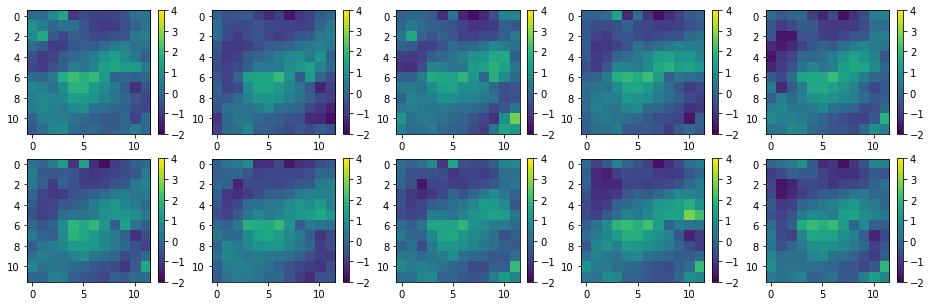

In [4]:
fig,ax = plt.subplots(2,5)
fig.set_size_inches((16,5))
for i in range(10):
    img = ax[i//5,i%5].imshow(modset.models[i]['reward_off'][:,:,0],vmin=-2,vmax=4)
    fig.colorbar(img, ax=ax[i//5,i%5]);

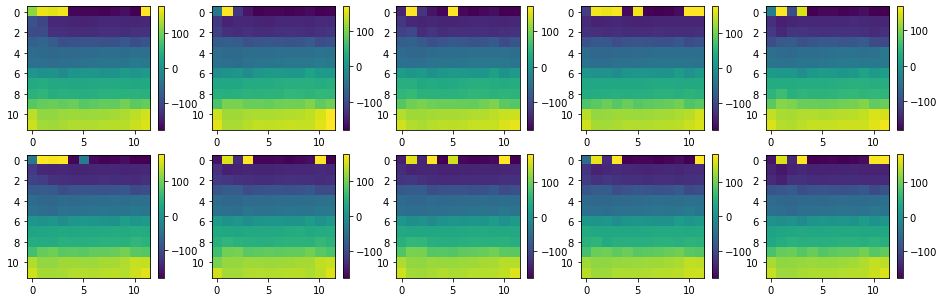

In [5]:
fig,ax = plt.subplots(2,5)
fig.set_size_inches((16,5))
for i in range(10):
    img = ax[i//5,i%5].imshow(modset.models[i]['body_off'][:,:,0])
    fig.colorbar(img, ax=ax[i//5,i%5]);

In [6]:
worm = eme.FakeWorm(modset)

In [22]:
learner.save_agent('test_agent.pkl')
learner.save_rewards('test_rewards.pkl')

In [2]:
dh = mba.DataHandler()
dh.load_df('./all_traj_df.pkl')

agent = tab.Q_Alpha_Agent(gamma=0.5,epsilon=0.05,alpha=0.01)
learner = mba.Learner(agent, dh, 'test', worm_pars={'num_models':1, 'frac':1})

C:\Users\ccli3\Miniconda3\envs\r919\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


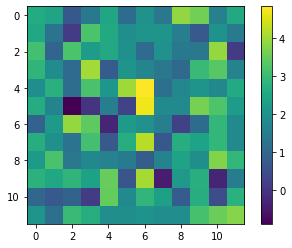

In [4]:
plt.imshow(learner.agent.Qtab[:,0].reshape(12,12))
plt.colorbar();

In [47]:
eval_r0=[]
for i in range(50):
    eval_r0.append(learner.eval_ep())

0.8177408855347631


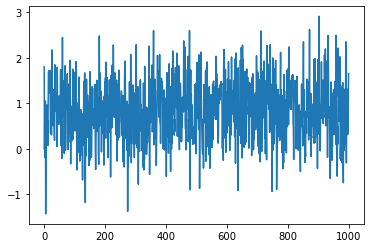

In [48]:
plt.plot(np.mean(eval_r0,axis=0))
print(np.mean(eval_r0))

0.9074689871577069


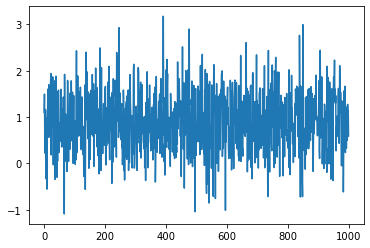

In [45]:
plt.plot(np.mean(eval_r0,axis=0))
print(np.mean(eval_r0))

In [46]:
learner.agent.resetq()
learner.reset_reward_vecs()

In [3]:
learner.learn(learn_limit=1000)

Agent test is on ep 0
Agent test is on ep 100
Agent test is on ep 200
Agent test is on ep 300
Agent test is on ep 400
Agent test is on ep 500
Agent test is on ep 600
Agent test is on ep 700
Agent test is on ep 800
Agent test is on ep 900


0.5128499249834279

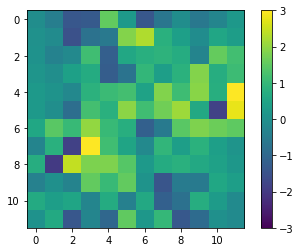

In [8]:
plt.imshow(learner.agent.Qtab[:,1].reshape(12,12)-learner.agent.Qtab[:,0].reshape(12,12),vmin=-3,vmax=3)
plt.colorbar();

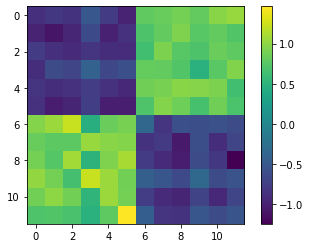

In [5]:
plt.imshow(learner.agent.Qtab[:,1].reshape(12,12)-learner.agent.Qtab[:,0].reshape(12,12))
plt.colorbar();

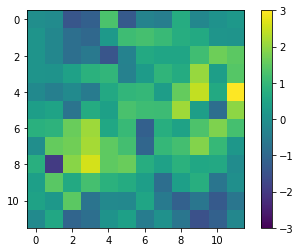

In [26]:
plt.imshow(learner.agent.Qtab[:,1].reshape(12,12)-learner.agent.Qtab[:,0].reshape(12,12),vmin=-3,vmax=3)
plt.colorbar();

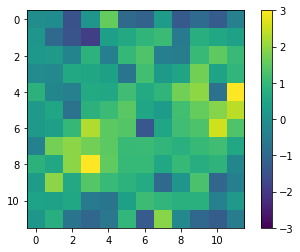

In [36]:
plt.imshow(learner.agent.Qtab[:,1].reshape(12,12)-learner.agent.Qtab[:,0].reshape(12,12),vmin=-3,vmax=3)
plt.colorbar();

In [1]:
import ensemble_mod_env as eme
import model_based_agent as mba
import numpy as np
import utils as ut
import matplotlib.pyplot as plt
import tab_agents as tab
import pickle
import fake_worm as fw

In [2]:
#learner.save_agent('test_ag.pkl')
with open('test_ag.pkl','rb') as f:
    agent = pickle.load(f)

In [4]:
worm = fw.FakeWorm()
runner = mba.WormRunner(worm, agent)

In [18]:
runner.full_run(100,'testrun0.pkl',eps_vector=[1])

In [19]:
with open('testrun0.pkl','rb') as f:
    test = pickle.load(f)

In [20]:
np.mean(test['reward'])

-0.007939124532409155

In [7]:
np.mean(test['reward'])

0.46464547444971915

In [21]:
x = np.zeros((15,2))
y = np.zeros((15,2))+1
xy = [x,y]

averaged = np.zeros((15,2))
for el in xy:
    averaged += (1/len(xy))*el 

In [22]:
averaged

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [23]:
from datetime import datetime
'./Data/realworm_'+datetime.now().strftime('%d-%m-%Y_%H-%M')+'.pkl'

'./Data/realworm_17-12-2020_13-48.pkl'

In [26]:
eps_vector = np.ones(10)
eps_vector[::2] -= .95

In [27]:
eps_vector

array([0.05, 1.  , 0.05, 1.  , 0.05, 1.  , 0.05, 1.  , 0.05, 1.  ])